<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/Wine_data_clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Data  
Clustering with k-means

## Explore Data

Let's analyze the result of a chemical analysis of wines grown in a particular region in Italy and try to group similar observations together and determine the number of possible clusters. This would help us make predictions and reduce dimensionality. 

In [167]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_wine

In [168]:
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [169]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [170]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

There is no missing data. However the attributes are not on the same scale. The scaling of data should be beneficial.

## Data Visualization

As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for k, the number of clusters.

There seem to be roughly three subgroups. 

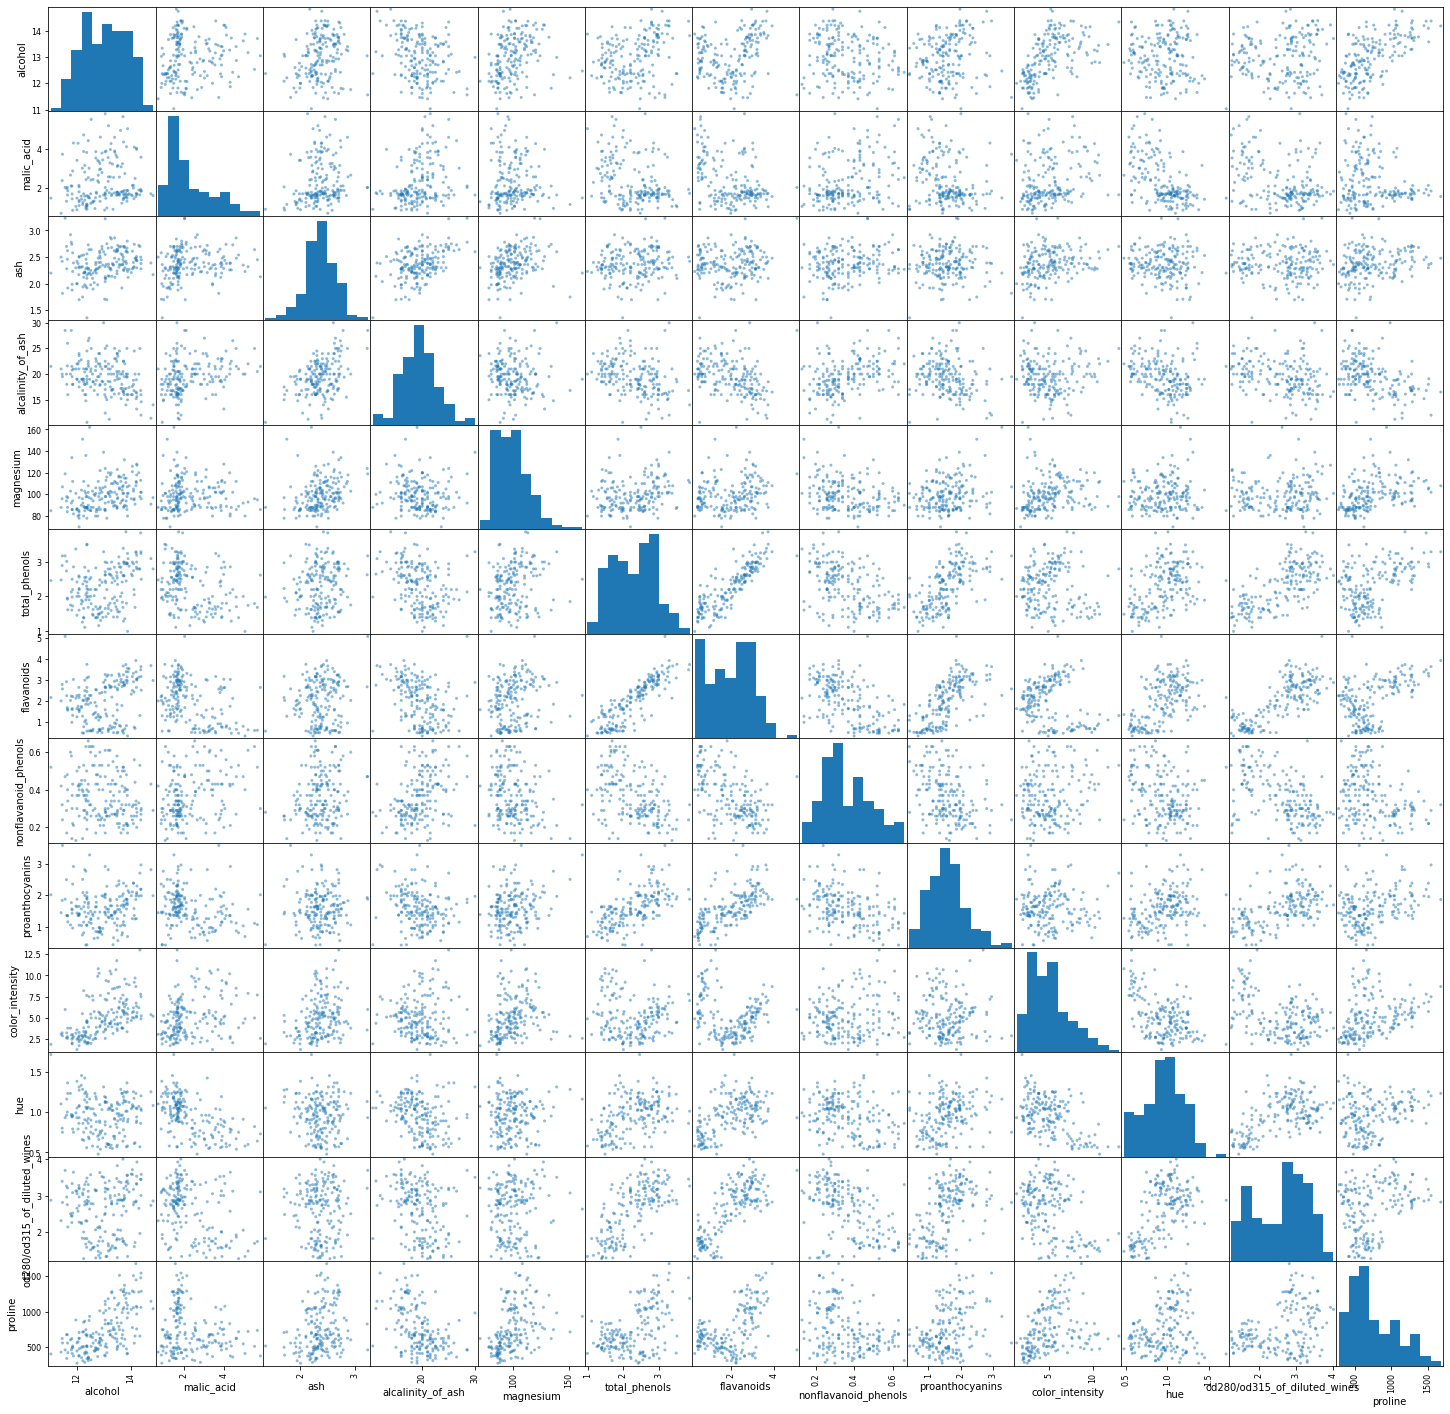

In [11]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

scatter_matrix(wine, figsize=(25,25))

plt.show()

After examining the scatterplot of  features alcohol and total_phenols three subclusters.

<function matplotlib.pyplot.show>

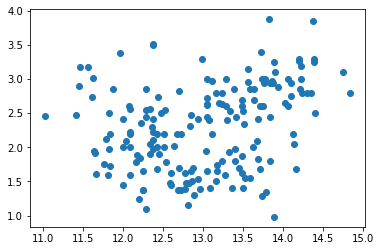

In [39]:
plt.scatter(wine['alcohol'], wine['total_phenols'])
plt.show

## Pre-processing: Standardization

In [132]:
X = wine[['alcohol', 'total_phenols']]

Note : 

In general, unsupervised machine learning models like k-means do not require to split data into training and testing sets since there is no ground truth to validate the model. However, centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales. One way to achieve this is to standardize the data.

In [133]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
print(scale.mean_)   # mean value for each feature
print(scale.scale_)  # Per feature relative scaling of the data. This shows the standard deviation for each feature.

[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [135]:
X_scaled = scale.transform(X)

Let's check the result visually.

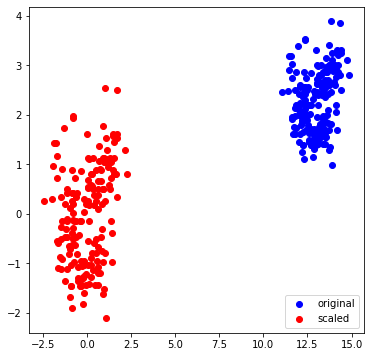

In [136]:
plt.figure(figsize=(6,6))
plt.scatter(X.alcohol, X.total_phenols, color='b', label="original")
plt.scatter(X_scaled[:,0], X_scaled[:,1], color='r', label='scaled')
plt.legend(loc='lower right')
plt.show()

#ax = X.plot()

#df2.plot(ax=ax)

## Modeling

The k-mean algorithm from scikit-learn will be applied. 

Just like with any machine learning algorithms in scikit-learn, to do the modeling, we follow workflow below:
 * instantiate
 * fit
 * predict


In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_scaled)

y_pred = kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 1 2 1 2 0 1 0 1
 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [138]:
unique, counts = np.unique(y_pred, return_counts=True)

print('Cluster', ' Counts')
print(np.asarray((unique, counts)).T)

Cluster  Counts
[[ 0 54]
 [ 1 65]
 [ 2 59]]


In [139]:
kmeans.cluster_centers_

array([[ 0.05253603, -1.14020926],
       [ 0.92017418,  0.87087204],
       [-1.06183503,  0.08414606]])

A better way to see the results is to visualize them:

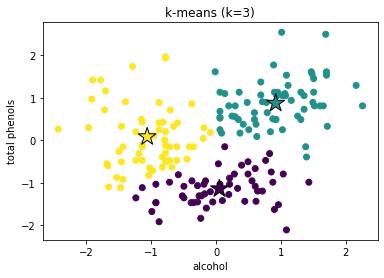

In [140]:
plt.scatter(X_scaled[:,0], 
            X_scaled[:,1],
            c= y_pred)

# identify the centroids

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker="*",
            s = 350, 
            c = [0,1,2], 
            edgecolors='k')

plt.xlabel('alcohol'); plt.ylabel('total phenols')

plt.title('k-means (k=3)')

plt.show()

The stars are the centroids. K-means divides wines into three groups: 
* low alcohol but high total phenols (upper right in purple) (0),
* high alcohol and high total phenols (upper left in yellow) (1),
* low total phenols (bottom in green) (2).

For any new wine with the chemical report on alcohol and total phenols, we now can classify it based on its distance to each of the centroids. 

### New data test

Suppose that there is new wine with alcohol at 13 and total phenols at 2.5, let’s predict which cluster the model will assign the new wine to. 

In [141]:
X_new = np.array([[13, 2.5]])

Next, we need to standardize the new data.

In [142]:
X_new_scaled = scale.transform(X_new)

print(X_new_scaled)


[[-0.00076337  0.32829793]]


Now we are ready to predict the cluster.

In [143]:
kmeans.predict(X_new_scaled)

array([1], dtype=int32)

## Optimal k: The Elbow Method

Note : Intuitively, k-means problem partitions n data points into k tight sets such that the data points are closer to each other than to the data points in the other clusters. And the tightness can be measured as the sum of squares of the distance from data point to its nearest centroid, or inertia. In scikit-learn, it is stored as **inertia_**.

In [144]:
# calculate distortion for a range of number of cluster

inertia = []

for i in np.arange(1, 11):

    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
print(inertia)

[356.0, 185.25081541190127, 114.37290289645736, 88.603520741702, 68.4600111522389, 55.994837057942625, 48.79867113721215, 44.47399482960307, 40.24267001779979, 36.67215795940465]


**The ellbow method:** 

As the plot shows, the inertia decreases as the number of clusters increases. The optimal k should be where the inertia no longer decreases as rapidly.

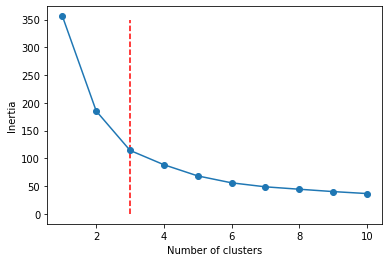

In [145]:
# plot

plt.plot(np.arange(1, 11), inertia, marker='o')
plt.vlines(x=3,ymin=0, ymax=350, ls='--', color='r' )
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

##Modeling With More Features

The model before was build using two out of thirteen features: alcohol and total phenols. The choice is random and it is easy to visualize the results. 

However, can we use more features, for example all of them. Let’s try it.

In [157]:
X_af = wine
  
scale_af = StandardScaler() 

scale_af.fit(X_af)
X_scaled_af = scale_af.transform(X_af)

Plot the inertia for a range of k to determine the optimal k via elbow method.

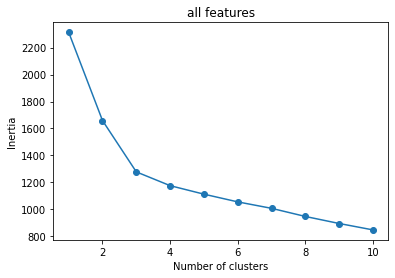

In [158]:
inertia = [] 
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled_af) 
    inertia.append(km.inertia_)

plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all features")

plt.show()

Similarly we see that the inertia no longer decreases as rapidly after k = 3. We then finalize the model by setting n_clusters = 3 and obtain the predictions.

In [181]:
k_opt = 3
kmeans_af = KMeans(k_opt)
kmeans_af.fit(X_scaled_af)
y_pred_all_f = kmeans_af.predict(X_scaled_af)
print(y_pred_all_f)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 1 2 1 2 0 1 0 1
 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


Let's compare the result and count how many wines in all feature clustering differ from two features clustering. 

In [189]:
unique, counts = np.unique(y_pred, return_counts=True)
unique_af, counts_af = np.unique(y_pred_all_f, return_counts=True)
abs(counts-counts_af).sum()

12

So which model is better? 
Clustering is an unsupervised learning method, which indicates that we don’t know the ground truth of the labels. Thus it is difficult to determine that the model with 2 features is more accurate in grouping wines than the one with all 13 features, or vice versa.

Which model, in other words which features, should you choose is often determined by external information. 

In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts.